<IPython.core.display.Javascript object>


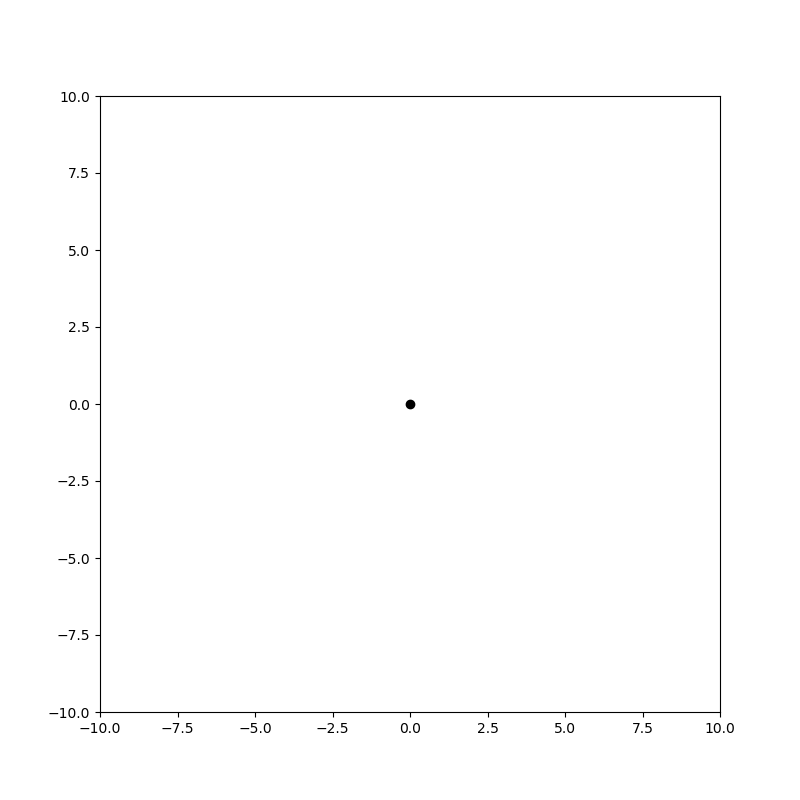

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))


def init():
    planet.set_data([], [])
    rphi.set_data([], [])
    return planet, # rphi


def redraw(i, planet, rphi, r, v, g, dt):
    r += v*dt
    v += - A * (r/(r[0]**2 + r[1]**2 + r[2]**2)**3) *dt
    
    planet.set_data(r[:2])
    return planet, # rphi


dt = 0.01
r = np.array([[1.5], [0], [0]], dtype=np.float64)  # r0
v = np.array([[0], [0.6], [0]], dtype=np.float64)  # v0
A = 1

r = r - v*dt/2

planet, = ax.plot(r[:2], 'bo', c='green', lw=1)
# rphi, = ax.plot(r[:2], lw=1) 
center, = ax.plot(0, 0, 'bo', c='black', lw=3)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=1,
                               blit=True,
                               fargs=(planet, rphi, r, v, g, dt),
                               )
